# Max-Area Evaluation

Contrary to Min-Area, we only use the Edge-Model because it has shown to be more efficient for maximization. This simplifies the analysis.

Experiments run with a timelimit of 7200s (2hr) on algpc02

The experimentes have been executed with CPLEX, thus, we do not have the data to analyze the progress over time for the area optimization. It does not seem to be feasible, to quickly change that. However, the two different models also take up some space.

## TODO:

* The model does not seem to reach its limit. Extend it?
* Onion is missing.

In [37]:
import json
import os
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_theme()
plt.rcParams.update({'figure.max_open_warning': 0
                    ,"text.usetex": True
                    ,"font.family": "serif"
                    })
sns.set_palette("tab10")
PAPER_WIDTH = 10

## Explaining the data

In [38]:
t_experiments = pd.read_json("./00_maxarea_data.json.zip")
full_techniques =  t_experiments[t_experiments["num_vertices"]==23]["sparsification_technique"].unique()
t_experiments = t_experiments[t_experiments["sparsification_technique"].isin(full_techniques)]

* **num_vertices:** The number of vertices in this instance. Most of the instances have been created in 5-steps.
* **sparsification_technique:** The used sparsification technique. The complete graph has "complete".
* **ObjVal:** The objective value of the solution (either optimal or the best at timeout).
* **filename_instance:** The file of the instance. Use this to distinguish different instances. The name also states something about its properties.
* **Runtime:** The runtime in seconds. The time limit has been 3600s.
* **Status:** The status code. 2 means solved to optimality. For sparisified instances, the instance may be solved in time but infeasible.
* **LowerBound:** The lower bound. If Status==2, it should equal the ObjVal.
* **solver:** Just the name of the solver. Not of relevance.
* **Model:** Used MIP-Model ("Edge"/"Triangle")
* **LowerBound_best:** The best known lower bound for the instance (complete graph)

In [39]:
ubs = t_experiments[t_experiments["sparsification_technique"]=="complete"].groupby("filename_instance")["UpperBound"].max()
t_experiments = pd.merge(left=t_experiments, right=ubs, left_on="filename_instance", right_index=True, suffixes=("", "_best"))

In [40]:
t_experiments

,ObjVal,LowerBound,Runtime,Solved,UpperBound,solver,id_solver,pointset,instance_solver,filename_solver,...,GRB_OUT_Incumbent,num_vertices,filename_sparsification,instance_sparsification,size,type,id_instance,filename_instance,size_binned,UpperBound_best
106,331995.000000,-1,0.049182,True,331995.000000,Max_area,iss036e009405_medium_10_0_complete_Max_area,iss036e009405_medium_10_0,iss036e009405_medium_10_0_complete,iss036e009405_medium_10_0_complete_Max_area.json,...,None,10,iss036e009405_medium_10_0_complete.json,iss036e009405_medium_10_0,10,image_brightness,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
107,331995.000000,-1,0.049182,True,331995.000000,Max_area,iss036e009405_medium_10_0_complete_Max_area,iss036e009405_medium_10_0,iss036e009405_medium_10_0_complete,iss036e009405_medium_10_0_complete_Max_area.json,...,None,10,iss036e009405_medium_10_0_complete.json,iss036e009405_medium_10_0,10,image_brightness,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
108,331995.000000,-1,0.049182,True,331995.000000,Max_area,iss036e009405_medium_10_0_complete_Max_area,iss036e009405_medium_10_0,iss036e009405_medium_10_0_complete,iss036e009405_medium_10_0_complete_Max_area.json,...,None,10,iss036e009405_medium_10_0_complete.json,iss036e009405_medium_10_0,10,image_brightness,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
109,331995.000000,-1,0.049182,True,331995.000000,Max_area,iss036e009405_medium_10_0_complete_Max_area,iss036e009405_medium_10_0,iss036e009405_medium_10_0_complete,iss036e009405_medium_10_0_complete_Max_area.json,...,None,10,iss036e009405_medium_10_0_complete.json,iss036e009405_medium_10_0,10,image_brightness,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
184,312811.000000,-1,0.013386,True,312811.000000,Max_area,iss036e009405_medium_10_0_delaunayT_Max_area,iss036e009405_medium_10_0,iss036e009405_medium_10_0_delaunayT,iss036e009405_medium_10_0_delaunayT_Max_area.json,...,None,10,iss036e009405_medium_10_0_delaunayT.json,iss036e009405_medium_10_0,10,image_brightness,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48086,0.000000,-1,0.006413,False,-1.000000,Max_area,20210725_uniform_real_11_1_yao12-1_Max_area,20210725_uniform_real_11_1,20210725_uniform_real_11_1_yao12-1,20210725_uniform_real_11_1_yao12-1_Max_area.json,...,None,11,20210725_uniform_real_11_1_yao12-1.json,20210725_uniform_real_11_1,11,uniform_real,20210725_uniform_real_11_1,20210725_uniform_real_11_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",91619.854971
48112,91619.854971,-1,0.044370,True,91619.854971,Max_area,20210725_uniform_real_11_1_yao12-2_Max_area,20210725_uniform_real_11_1,20210725_uniform_real_11_1_yao12-2,20210725_uniform_real_11_1_yao12-2_Max_area.json,...,None,11,20210725_uniform_real_11_1_yao12-2.json,20210725_uniform_real_11_1,11,uniform_real,20210725_uniform_real_11_1,20210725_uniform_real_11_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",91619.854971
48093,0.000000,-1,0.006543,False,-1.000000,Max_area,20210725_uniform_real_11_1_yao6-0_Max_area,20210725_uniform_real_11_1,20210725_uniform_real_11_1_yao6-0,20210725_uniform_real_11_1_yao6-0_Max_area.json,...,None,11,20210725_uniform_real_11_1_yao6-0.json,20210725_uniform_real_11_1,11,uniform_real,20210725_uniform_real_11_1,20210725_uniform_real_11_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",91619.854971
48089,68059.056931,-1,0.013659,True,68059.056931,Max_area,20210725_uniform_real_11_1_yao6-1_Max_area,20210725_uniform_real_11_1,20210725_uniform_real_11_1_yao6-1,20210725_uniform_real_11_1_yao6-1_Max_area.json

In [41]:
t_experiments[t_experiments["UpperBound"]>1.01*t_experiments["ObjVal"]]

,ObjVal,LowerBound,Runtime,Solved,UpperBound,solver,id_solver,pointset,instance_solver,filename_solver,...,GRB_OUT_Incumbent,num_vertices,filename_sparsification,instance_sparsification,size,type,id_instance,filename_instance,size_binned,UpperBound_best
7359,9.310115e+05,-1,3612.180955,True,9.604433e+05,Max_area,GSFC_20171208_Archive_e000256_orig_23_0_comple...,GSFC_20171208_Archive_e000256_orig_23_0,GSFC_20171208_Archive_e000256_orig_23_0_complete,GSFC_20171208_Archive_e000256_orig_23_0_comple...,...,None,23,GSFC_20171208_Archive_e000256_orig_23_0_comple...,GSFC_20171208_Archive_e000256_orig_23_0,23,image_brightness,GSFC_20171208_Archive_e000256_orig_23_0,GSFC_20171208_Archive_e000256_orig_23_0.json,None,9.604433e+05
15111,1.066379e+06,-1,3613.639544,True,1.105714e+06,Max_area,iss036e025984_large_23_0_complete_Max_area,iss036e025984_large_23_0,iss036e025984_large_23_0_complete,iss036e025984_large_23_0_complete_Max_area.json,...,None,23,iss036e025984_large_23_0_complete.json,iss036e025984_large_23_0,23,image_brightness,iss036e025984_large_23_0,iss036e025984_large_23_0.json,None,1.105714e+06
7322,1.788805e+05,-1,3617.330605,True,1.898122e+05,Max_area,732px-Angela_Merkel_2019_cropped_23_0_complete...,732px-Angela_Merkel_2019_cropped_23_0,732px-Angela_Merkel_2019_cropped_23_0_complete,732px-Angela_Merkel_2019_cropped_23_0_complete...,...,None,23,732px-Angela_Merkel_2019_cropped_23_0_complete...,732px-Angela_Merkel_2019_cropped_23_0,23,image_edge,732px-Angela_Merkel_2019_cropped_23_0,732px-Angela_Merkel_2019_cropped_23_0.json,None,1.898122e+05
36335,1.924545e+05,-1,3616.101661,True,2.057132e+05,Max_area,"Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...","Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...","Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...","Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...",...,None,23,"Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...","Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...",23,image_edge,"Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...","Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...",None,2.057132e+05
42478,3.777555e+05,-1,3603.588841,True,3.822909e+05,Max_area,Joe_Biden_presidential_portrait_23_0_complete_...,Joe_Biden_presidential_portrait_23_0,Joe_Biden_presidential_portrait_23_0_complete,Joe_Biden_presidential_portrait_23_0_complete_...,...,None,23,Joe_Biden_presidential_portrait_23_0_complete....,Joe_Biden_presidential_portrait_23_0,23,image_edge,Joe_Biden_presidential_portrait_23_0,Joe_Biden_presidential_portrait_23_0.json,None,3.822909e+05
44781,3.353430e+05,-1,3606.980555,True,3.400536e+05,Max_area,808px-Donald_Trump_official_portrait_23_0_comp...,808px-Donald_Trump_official_portrait_23_0,808px-Donald_Trump_official_portrait_23_0_comp...,808px-Donald_Trump_official_portrait_23_0_comp...,...,None,23,808px-Donald_Trump_official_portrait_23_0_comp...,808px-Donald_Trump_official_portrait_23_0,23,image_edge,808px-Donald_Trump_official_portrait_23_0,808px-Donald_Trump_official_portrait_23_0.json,None,3.400536e+05
9611,5.338879e+00,-1,3607.024934,True,5.467713e+00,Max_area,20210902_normal_23_6_complete_Max_area,20210902_normal_23_6,20210902_normal_23_6_complete,20210902_normal_23_6_complete_Max_area.json,...,None,23,20210902_normal_23_6_complete.json,20210902_normal_23_6,23,normal,20210902_normal_23_6,20210902_normal_23_6.json,None,5.467713e+00
25081,7.317009e+00,-1,3613.076993,True,7.679818e+00,Max_area,20210902_normal_22_6_complete_Max_area,20210902_normal_22_6,20210902_normal_22_6_complete,20210902_normal_22_6_complete_Max_area.json,...,None,22,20210902_normal_22_6_complete.json,20210902_normal_22_6,22,normal,20210902_normal_22_6,20210902_normal_22_6.json,None,7.679818e+00
43064,6.719896e+00,-1,3616.667435,True,7.201512e+00,Max_area,20210902_normal_23_9_complete_Max_area,20210902_normal_23_9,20210902_normal_23_9_complete,20210902_normal_23_9_complete_Max_area.json,...,None,23,20210902_normal_23_9_complete.json,20210902_normal_23_9,23,normal,20210902_normal_23_9,20210902_nor

<Axes: ylabel='Frequency'>

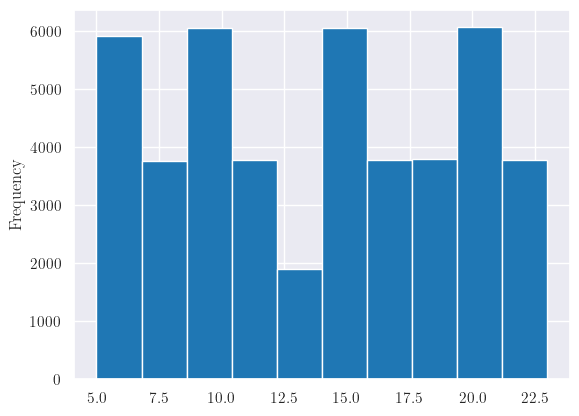

In [42]:
t_experiments["num_vertices"].plot.hist()

## 1. Feasibility

Quite a lot of sparsifications instances are rarely feasible. We again filter them out.

In [43]:
only_larger_than = 5
num_instances = t_experiments[(t_experiments["num_vertices"]>=only_larger_than)]["filename_instance"].nunique()
t = t_experiments[(t_experiments["Status"]==3) & (t_experiments["num_vertices"]>=only_larger_than)].groupby("sparsification_technique")["filename_instance"].nunique()/num_instances
t

sparsification_technique
greedyT      0.001053
onion-1-1    0.001053
theta12-0    0.923158
theta12-1    0.929474
theta12-2    0.003158
theta6-0     0.492632
theta6-1     0.485263
theta6-2     0.036842
wspd2-1      0.066316
wspd2-2      0.051579
wspd2-3      0.021053
wspd3-1      0.115789
wspd3-3      0.040000
wspd4-1      0.140000
wspd4-3      0.053684
wspd5-1      0.169474
wspd5-3      0.069474
wspd6-1      0.195789
wspd6-3      0.082105
wspd7-1      0.212632
wspd7-3      0.089474
wspd8-1      0.220000
wspd8-3      0.100000
yao12-0      0.924211
yao12-1      0.929474
yao12-2      0.004211
yao6-0       0.473684
yao6-1       0.454737
yao6-2       0.029474
Name: filename_instance, dtype: float64

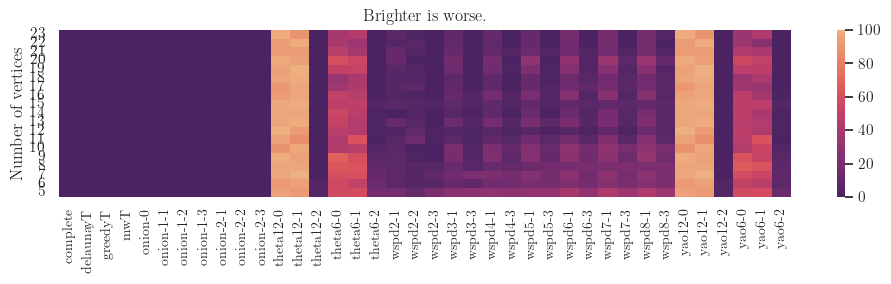

In [44]:
fig = plt.figure(figsize=(PAPER_WIDTH,3))
t = t_experiments.copy()
t["Infeasible"] = (t["Status"]==3).apply(lambda x: 100 if x else 0)
t_ = t.groupby(["num_vertices", "sparsification_technique"])["Infeasible"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["Infeasible"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True, yticklabels=True)
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
plt.title("Brighter is worse.")
plt.tight_layout()
plt.savefig("./output/feasibility.pdf")
plt.show()

As we see above, the infeasible instances are relatively independent of the size and nearly identical for both models.

Let us ignore the following sparsification techniques, because more than 10% of them are infeasible

In [45]:
t = t_experiments[(t_experiments["Status"]==3) & (t_experiments["num_vertices"]>=only_larger_than)].groupby("sparsification_technique")["filename_instance"].nunique()/num_instances
techniques_to_ignore = list(t[t>0.1].index)
techniques_to_ignore

['theta12-0',
 'theta12-1',
 'theta6-0',
 'theta6-1',
 'wspd3-1',
 'wspd4-1',
 'wspd5-1',
 'wspd6-1',
 'wspd7-1',
 'wspd8-1',
 'yao12-0',
 'yao12-1',
 'yao6-0',
 'yao6-1']

In [46]:
t_experiments_feasible = t_experiments[~t_experiments["sparsification_technique"].isin(techniques_to_ignore)]

## 2. Solution Quality

Let us next look at the solution quality because bad solutions are not useful independent of how quick we can obtain them.

We are using *best upper bound/best lower bound* as metric (all bounds computed with timeout).

In [47]:
t = t_experiments_feasible.copy()
t=t[t["Status"]!=3]
t["Gap"] = t["ObjVal"]/t["UpperBound_best"]

In [48]:
# This instance has different values for the two models (complete). This should not happen!
t_experiments[t_experiments["filename_instance"]=="20210725_normal_10_1.json"].sort_values(by="sparsification_technique")

,ObjVal,LowerBound,Runtime,Solved,UpperBound,solver,id_solver,pointset,instance_solver,filename_solver,...,GRB_OUT_Incumbent,num_vertices,filename_sparsification,instance_sparsification,size,type,id_instance,filename_instance,size_binned,UpperBound_best
1349,2.742344,-1,0.039039,True,2.742344,Max_area,20210725_normal_10_1_complete_Max_area,20210725_normal_10_1,20210725_normal_10_1_complete,20210725_normal_10_1_complete_Max_area.json,...,None,10,20210725_normal_10_1_complete.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
1329,2.364134,-1,0.022112,True,2.364134,Max_area,20210725_normal_10_1_delaunayT_Max_area,20210725_normal_10_1,20210725_normal_10_1_delaunayT,20210725_normal_10_1_delaunayT_Max_area.json,...,None,10,20210725_normal_10_1_delaunayT.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
1325,2.742344,-1,0.026101,True,2.742344,Max_area,20210725_normal_10_1_greedyT_Max_area,20210725_normal_10_1,20210725_normal_10_1_greedyT,20210725_normal_10_1_greedyT_Max_area.json,...,None,10,20210725_normal_10_1_greedyT.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
1343,2.742344,-1,0.026758,True,2.742344,Max_area,20210725_normal_10_1_mwT_Max_area,20210725_normal_10_1,20210725_normal_10_1_mwT,20210725_normal_10_1_mwT_Max_area.json,...,None,10,20210725_normal_10_1_mwT.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
1327,2.585227,-1,0.092377,True,2.585227,Max_area,20210725_normal_10_1_onion-0_Max_area,20210725_normal_10_1,20210725_normal_10_1_onion-0,20210725_normal_10_1_onion-0_Max_area.json,...,None,10,20210725_normal_10_1_onion-0.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
1345,2.742344,-1,0.010777,True,2.742344,Max_area,20210725_normal_10_1_onion-1-1_Max_area,20210725_normal_10_1,20210725_normal_10_1_onion-1-1,20210725_normal_10_1_onion-1-1_Max_area.json,...,None,10,20210725_normal_10_1_onion-1-1.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
1319,2.742344,-1,0.026624,True,2.742344,Max_area,20210725_normal_10_1_onion-1-2_Max_area,20210725_normal_10_1,20210725_normal_10_1_onion-1-2,20210725_normal_10_1_onion-1-2_Max_area.json,...,None,10,20210725_normal_10_1_onion-1-2.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
1359,2.742344,-1,0.024557,True,2.742344,Max_area,20210725_normal_10_1_onion-1-3_Max_area,20210725_normal_10_1,20210725_normal_10_1_onion-1-3,20210725_normal_10_1_onion-1-3_Max_area.json,...,None,10,20210725_normal_10_1_onion-1-3.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
1334,2.610256,-1,0.050058,True,2.610256,Max_area,20210725_normal_10_1_onion-2-1_Max_area,20210725_normal_10_1,20210725_normal_10_1_onion-2-1,20210725_normal_10_1_onion-2-1_Max_area.json,...,None,10,20210725_normal_10_1_onion-2-1.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
1320,2.742344,-1,0.023330,True,2.742344,Max_area,20210725_normal_10_1_onion-2-2_Max_area,20210725_normal_10_1,20210725_normal_10_1_onion-2-2,20210725_normal_10_1_onion-2-2_Max_area.json,...,None,10,20210725_normal_10_1_onion-2-2.json,20210725_normal_10_1,10,normal,20210725_normal_10_1,20210725_normal_10_1.json,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344


In [49]:
bad_instances = t[t["Gap"]>1.01]["filename_instance"].unique()
if list(bad_instances):
    print("Removing bad instances to continue working while waiting for response.", bad_instances)
    t = t[~t["filename_instance"].isin(bad_instances)]

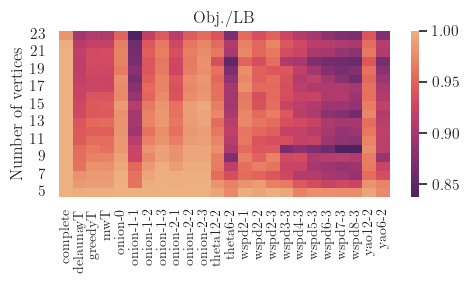

In [50]:
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))
t_ = t.groupby(["num_vertices", "sparsification_technique"])["Gap"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["Gap"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True)
#plt.xlabel("Sparsification Technique")
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
#plt.title("Brighter is worse.")
plt.title("Obj./LB")
plt.tight_layout()
plt.savefig("./output/solution_quality_heatmap.pdf")
plt.show()

/tmp/ipykernel_54659/895896267.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=t_, x="x", y="Gap", hue="spars", style="spars",ci=None)


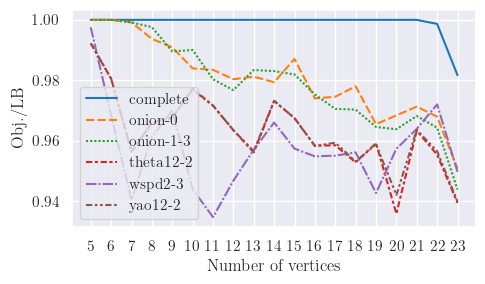

In [51]:
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))
detail_sparsification_techniques = ["complete", "onion-0", "onion-1-3", "theta12-2", "wspd2-3", "yao12-2"]
t_ = t[t["sparsification_technique"].isin(detail_sparsification_techniques)].copy()
t_.rename(columns={"sparsification_technique": "spars"}, inplace=True)
t_["x"]=t_["num_vertices"].apply(lambda x: str(int(x)))
t_.sort_values(by=["num_vertices", "spars"], inplace=True)
sns.lineplot(data=t_, x="x", y="Gap", hue="spars", style="spars",ci=None)
plt.legend(title="")
plt.xlabel("Number of vertices")
#plt.title("Lower is better.")
plt.tight_layout()
plt.ylabel("Obj./LB")
plt.savefig("./output/solution_quality_lineplot.pdf")
plt.show()

There are three promising candidates: *theta12-2*, *wspd2-3*, and *yao12-2*. Theta and Yao seem to yield the same results. All three seem to decline in quality but Theta and Yao are below 5%.

## 2. Runtime

Let us next take a look on the runtime. We are comparing a lot of different strategies which are too much for a lineplot. Instead we do a heatmap that shows us, which instances could still be solved wihtin a strict time limit. Infeasible instances are considered as unsolved (they are slightly worse but in both cases we do not obtain the desired solution from the sparsification).

From this heatmap, we select a few intersting strategies for which we then also compare the concrete runtime in a lineplot.

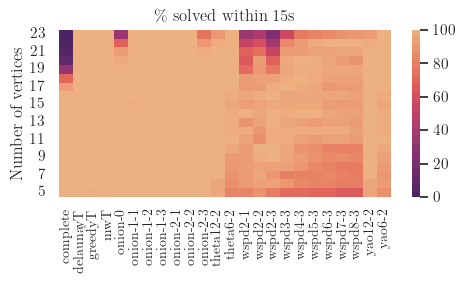

In [52]:
TIMEOUT_AFTER_S = 15
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))

t = t_experiments_feasible.copy()
t["timeout"] = (t["Runtime"]>TIMEOUT_AFTER_S).apply(lambda x: 0 if x else 100)
t.loc[t["Status"]!=2, "timeout"]=0
t_ = t.groupby(["num_vertices", "sparsification_technique"])["timeout"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["timeout"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True, vmin=0)
#plt.xlabel("Sparsification Technique")
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
plt.title(f"\% solved within {TIMEOUT_AFTER_S}s")
#plt.title(f"Solved within {TIMEOUT_AFTER_S}s. Brighter is better.")
plt.tight_layout()
plt.savefig("./output/runtime_heatmap.pdf")
plt.show()

/tmp/ipykernel_54659/3047454566.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=t_, x="x", y="Runtime", hue="Sparsification", style="Sparsification",ci=None)


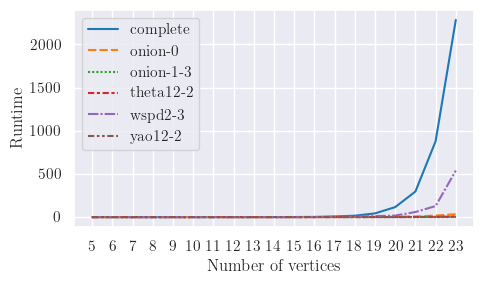

In [53]:
INTERESTING_STRATEGIES =["complete", "onion-0", "onion-1-3", "theta12-2", "wspd2-3", "yao12-2"]
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))
t = t_experiments_feasible.copy()
t["timeout"] = (t["Runtime"]>TIMEOUT_AFTER_S).apply(lambda x: 0 if x else 100)
t.loc[t["Status"]!=2, "timeout"]=0
t_ = t[t["sparsification_technique"].isin(INTERESTING_STRATEGIES)].copy()
t_["x"]=t_["num_vertices"].apply(lambda x: str(int(x)))
t_.sort_values(by=["num_vertices", "sparsification_technique"], inplace=True)
t_.rename(columns={"sparsification_technique": "Sparsification"}, inplace=True)
sns.lineplot(data=t_, x="x", y="Runtime", hue="Sparsification", style="Sparsification",ci=None)
plt.legend(title="")
plt.xlabel("Number of vertices")
plt.tight_layout()
plt.savefig("./output/runtime_lineplot.pdf")
plt.show()

Not only do theta and yao yield good results, they are also extremely fast to solve. This makes some great candidates for initial solutions.